In [1]:
##Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
##Load the data 
mta = pd.read_csv('MTA_Daily_Ridership.csv')
ridership = mta.copy()

##Eye-ball the data
ridership.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [3]:
##Recommended Analysis are:
#1. What was the share of traffic by service before the pandemic? Did it change?
#2. Which service saw the biggest drop-off in traffic? Has it recovered?
#3. Which service was the fastest to recover?
#4. When are all the services estimated to return to pre-pandemic levels?

share_of_traffic: 
Subways: % of Comparable Pre-Pandemic Day                55.461313
Buses: % of Comparable Pre-Pandemic Day                  54.692849
LIRR: % of Comparable Pre-Pandemic Day                   59.128370
Metro-North: % of Comparable Pre-Pandemic Day            51.083236
Access-A-Ride: % of Comparable Pre-Pandemic Day          86.165299
Bridges and Tunnels: % of Comparable Pre-Pandemic Day    93.375147
Bridges and Tunnels: % of Comparable Pre-Pandemic Day    93.375147
dtype: float64


Text(0, 0.5, 'share of traffic')

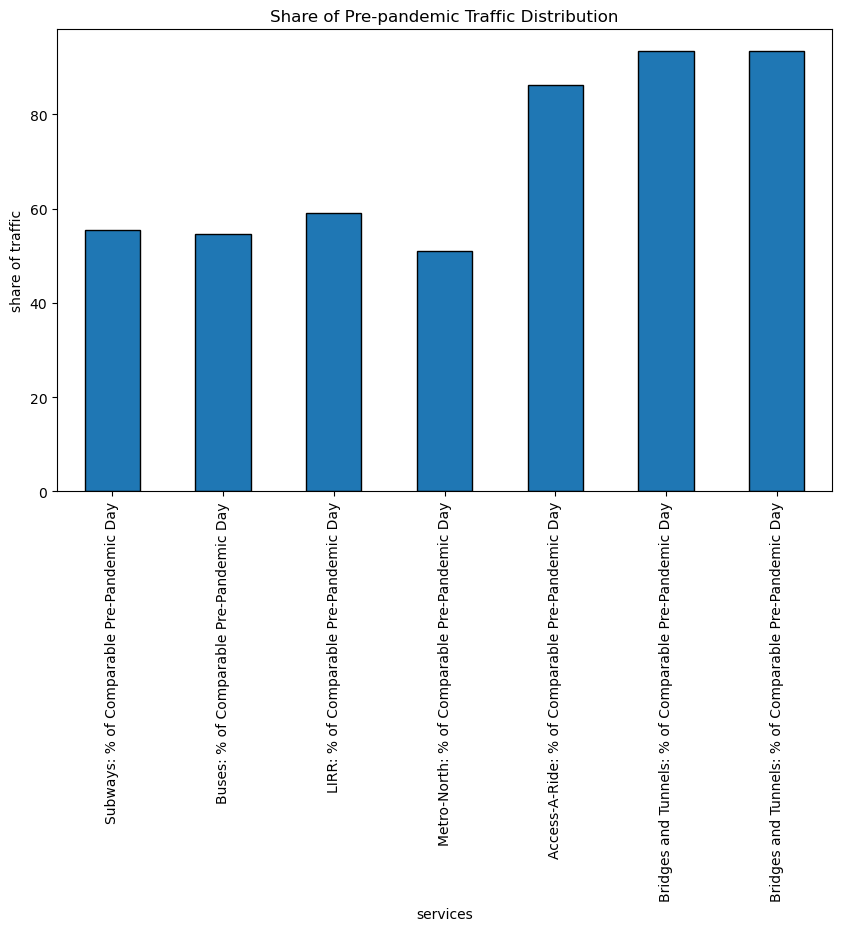

In [32]:
#1. What was the share of traffic by service before the pandemic? 
##The share of traffic by services before the pandemic is the average traffic contributed by each service before the pandemic
share_of_traffic = ridership[["Subways: % of Comparable Pre-Pandemic Day", "Buses: % of Comparable Pre-Pandemic Day", 
                              "LIRR: % of Comparable Pre-Pandemic Day", "Metro-North: % of Comparable Pre-Pandemic Day",
                              "Access-A-Ride: % of Comparable Pre-Pandemic Day", "Bridges and Tunnels: % of Comparable Pre-Pandemic Day",
                              "Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]].mean()
##Display the share of trafic
print(f"share_of_traffic: \n{share_of_traffic}")

##Plot a bar-chart showing the share of traffic distribution
share_of_traffic.plot(kind = 'bar', figsize = (10,6), title = 'Share of Pre-pandemic Traffic Distribution', edgecolor = 'black')
plt.xlabel('services')
plt.ylabel('share of traffic')

post_pandemic estimated_ridership is: 
Subways: Total Estimated Ridership                  4280447795
Buses: Total Estimated Ridership                    1717716966
LIRR: Total Estimated Ridership                      231947958
Metro-North: Total Estimated Ridership               195999394
Access-A-Ride: Total Scheduled Trips                  37432255
Bridges and Tunnels: Total Traffic                  1459658489
Staten Island Railway: Total Estimated Ridership       7556480
dtype: int64


Text(0, 0.5, 'Post-pandemic')

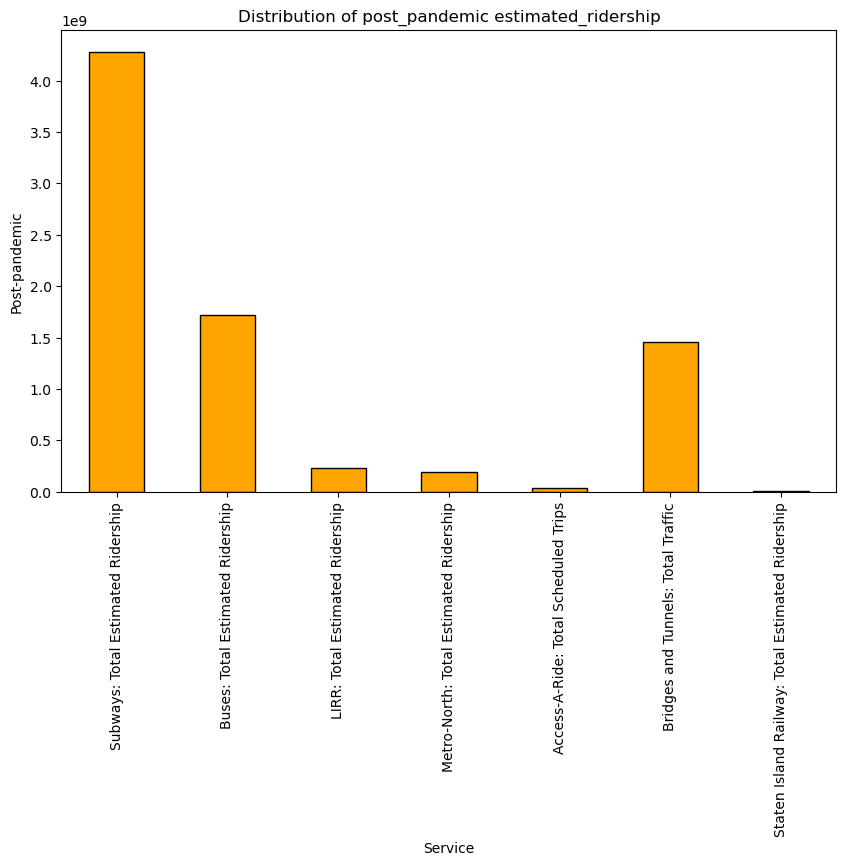

In [5]:
#1b.) Did it change?
# To resolve this, we'll have to look at total estimated ridership of the services
post_pandemic_estimated_ridership = ridership[["Subways: Total Estimated Ridership", "Buses: Total Estimated Ridership", "LIRR: Total Estimated Ridership",
                                               "Metro-North: Total Estimated Ridership", "Access-A-Ride: Total Scheduled Trips", 
                                 "Bridges and Tunnels: Total Traffic", "Staten Island Railway: Total Estimated Ridership"]].sum()

##Display estimated ridership of the services post-pandemic
print(f'post_pandemic estimated_ridership is: \n{post_pandemic_estimated_ridership}')    

##Plot a bar-chart showing estimated ridership
post_pandemic_estimated_ridership.plot(kind = 'bar', figsize=(10,6), title = 'Distribution of post_pandemic estimated_ridership', 
                                       color = 'orange', edgecolor = 'black')
plt.xlabel('Service')
plt.ylabel('Post-pandemic')

In [6]:
##looking at the estimated ridership and pre-pandemic share of traiffic, we notice that the estimated ridership
# are not given in percentage. Hence, we'll have to calculate it's percentage and make comparison b/w both to
# get the change

##firstly, let's put estimated ridership and share of traffic in a single dataframe
traffic_ridership = pd.DataFrame({"Services" : ["Subways", "Buses", "LIRR", "Metro-North", "Access-A-Ride", "Bridges and Tunnels",
                                                "Staten Island Railway"],"Pre-pandemic(%)" : [55.461313, 54.692849, 59.128370, 51.083236, 
                                                                                              86.165299, 93.375147, 93.375147], 
                                  "post_pandemic_estimated_ridership": [4280447795, 1717716966, 231947958, 195999394, 37432255, 1459658489, 7556480]})

##Convert pre-pandemic % to real numbers
traffic_ridership['Pre-pandemic number'] = (traffic_ridership['post_pandemic_estimated_ridership'] / traffic_ridership ['Pre-pandemic(%)']) * 100

##traffic share change in real numbers
traffic_ridership['traffic share change'] = traffic_ridership['Pre-pandemic number'] - traffic_ridership['post_pandemic_estimated_ridership']

traffic_ridership['traffic share change(%)'] = ((traffic_ridership['Pre-pandemic number'] - traffic_ridership['post_pandemic_estimated_ridership'])
                                                /traffic_ridership['Pre-pandemic number']) * 100
traffic_ridership

,Services,Pre-pandemic(%),post_pandemic_estimated_ridership,Pre-pandemic number,traffic share change,traffic share change(%)
0,Subways,55.461313,4280447795,7.717898e+09,3.437451e+09,44.538687
1,Buses,54.692849,1717716966,3.140661e+09,1.422944e+09,45.307151
2,LIRR,59.128370,231947958,3.922786e+08,1.603307e+08,40.871630
3,Metro-North,51.083236,195999394,3.836863e+08,1.876869e+08,48.916764
4,Access-A-Ride,86.165299,37432255,4.344238e+07,6.010123e+06,13.834701
5,Bridges and Tunnels,93.375147,1459658489,1.563219e+09,1.035610e+08,6.624853
6,Staten Island Railway,93.375147,7556480,8.092603e+06,5.361231e+05,6.624853


In [7]:
### Thus, from the above, we oberved a drop in traffic (traffic_changes) in the services (from pre-pandemic to post-pandemic):
#1. Subways: 55.46% to 44.54%
#2. Buses: 54.69% to 45.37%
#3. LIRR: 59.13% to 40.87%
#4. Metro-North: 51.08% to 48.92%
#5. Bridges and Tunnels: 93.38% to 6.62%
#6. Staten Island Railway: 37.82% to 62.19%

## These drop in post-pandemic traffic shares makes sense given the significant shifts in behavior,
# infrastructure, and societal norms caused by the pandemic. Many of these changes—such as remote work, safety concerns, and shifts in travel 
# patterns—are logical and expected consequences of a global disruption like COVID-19.

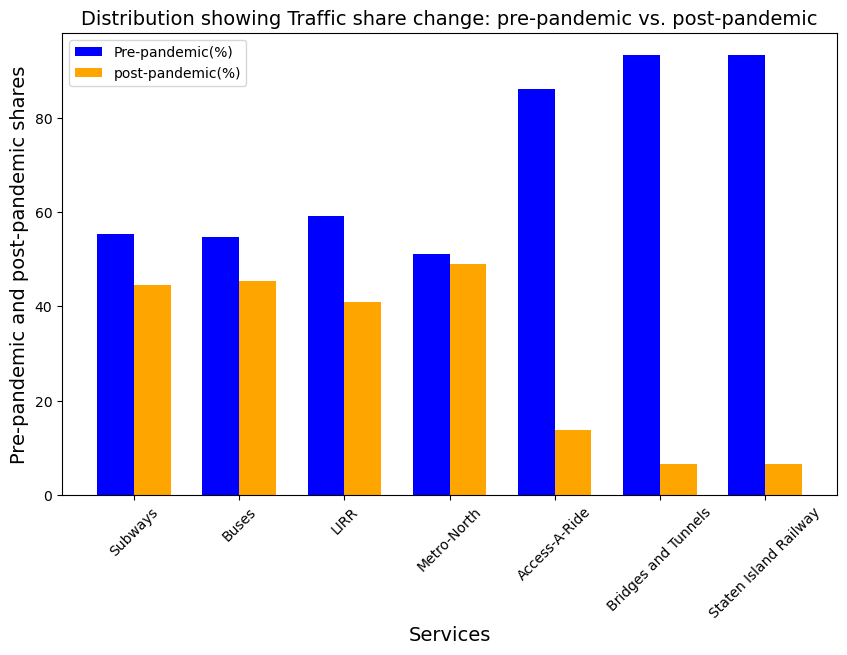

In [8]:
##Plot a bar-chart showing the visual of traffic change

#Parameters
services = traffic_ridership['Services']
pre_pandemic = traffic_ridership['Pre-pandemic(%)']
post_pandemic = traffic_ridership['traffic share change(%)']

##set bar_chart positions and bar_width
x = np.arange(len(services))
bar_width = 0.35

##Create the plot
plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, pre_pandemic, bar_width,  label = 'Pre-pandemic(%)', color = 'blue')
plt.bar(x + bar_width/2, post_pandemic, bar_width,  label = 'post-pandemic(%)', color = 'orange')
plt.title('Distribution showing Traffic share change: pre-pandemic vs. post-pandemic', fontsize = 14)
plt.xlabel('Services', fontsize = 14)
plt.ylabel('Pre-pandemic and post-pandemic shares', fontsize = 14)
plt.xticks(x, services, rotation = 45, fontsize = 10)
plt.legend()
plt.show()

In [9]:
##2. biggest_drop_off
biggest_drop_off = traffic_ridership.drop(['post_pandemic_estimated_ridership',	'Pre-pandemic number', 'traffic share change'], axis = 1)
biggest_drop_off = biggest_drop_off.sort_values(by = 'traffic share change(%)', ascending = True)
biggest_drop_off

,Services,Pre-pandemic(%),traffic share change(%)
5,Bridges and Tunnels,93.375147,6.624853
6,Staten Island Railway,93.375147,6.624853
4,Access-A-Ride,86.165299,13.834701
2,LIRR,59.128370,40.871630
0,Subways,55.461313,44.538687
1,Buses,54.692849,45.307151
3,Metro-North,51.083236,48.916764


In [10]:
#Thus, biggest drop off is: Bridges and Tunnels: 93.38% to 6.62%

In [11]:
##2b.) Has it recovered? 

##this is resolved by extracting the recent data-points and compare them to traffic shares at pre-pandemic levels
recovery = ridership[["Subways: % of Comparable Pre-Pandemic Day", "Buses: % of Comparable Pre-Pandemic Day", 
                              "LIRR: % of Comparable Pre-Pandemic Day", "Metro-North: % of Comparable Pre-Pandemic Day",
                              "Access-A-Ride: % of Comparable Pre-Pandemic Day", "Bridges and Tunnels: % of Comparable Pre-Pandemic Day",
                              "Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]].tail(1)
recovery

,Subways: % of Comparable Pre-Pandemic Day,Buses: % of Comparable Pre-Pandemic Day,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
1705,70,58,82,76,126,103,103


In [12]:
##The table shows the most recent percentages of recovery (post-pandemic) for various transit services, relative to their pre-pandemic levels.
##Observations:
#1. Subways: Subway has a recovery level of 70%. This indicates that while usage has rebounded, it remains 30% below pre-pandemic levels.

#2. Buses: Buses has a recovery level of 58%. This indicates it remains 42% below pre-pandemic levels.

#3. LIRR: This has a recovery level of 82%, which indicates a rebound but still 18% pre-pandemic levels.

#4. Metro-North: Metro-North has a recovery level of 76%, indicating a rebound still below 24% below pre-pandemic levels.

#5. Access-A-Ride: This has recovery level of 126%, indicating it has recovered and exceeded pre-pandemic levels.

#6. Bridges and Tunnel:  Bridges and Tunnel -- the service that got the biggest drop has a recovery of 103%, 
#   which indicates it has fully recovered and exceeded pre-pandemic levels.

#7. Staten Island Railway: Staten Island Railway has a recovery level of 42%, indicating a rebound 58% below pre-pandemic levels.
#   This is the service showing the weakest recovery

In [13]:
#3. Which service was the fastest to recover?

##This is resolved by looking at the recent data-entry with the pre-pandemic(%) as the baseline
fastest_recovery = share_of_traffic.idxmax()
print(f'The service that was the fastest to recover is:\n{fastest_recovery}')

The service that was the fastest to recover is:
Bridges and Tunnels: % of Comparable Pre-Pandemic Day


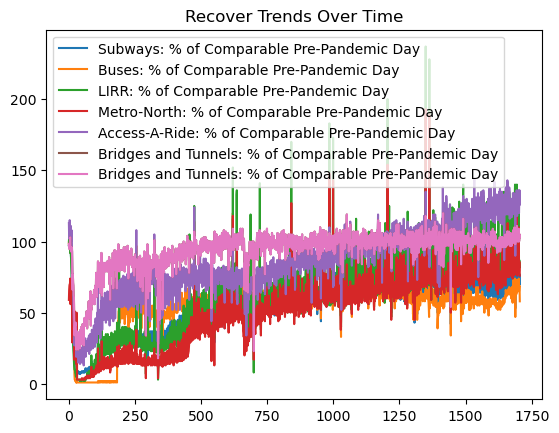

In [14]:
##Plot Recovery trends overtime

services = ["Subways: % of Comparable Pre-Pandemic Day", "Buses: % of Comparable Pre-Pandemic Day", 
            "LIRR: % of Comparable Pre-Pandemic Day", "Metro-North: % of Comparable Pre-Pandemic Day",
            "Access-A-Ride: % of Comparable Pre-Pandemic Day", "Bridges and Tunnels: % of Comparable Pre-Pandemic Day",
            "Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

for service in services:
    ridership[service].plot(label = service, title = 'Recover Trends Over Time')
plt.legend()
plt.show()

In [15]:
##Plot Linear Regression to predict the date of recovery

##Convert Dates to Datetime
ridership['Date'] = pd.to_datetime(ridership['Date'])
start_date = pd.to_datetime('2020-01-01')
ridership['days_since_start'] = (ridership['Date'] - start_date).dt.days

results = {}

for service in services:
    ##Set regression Parameters
    ridership = ridership.dropna(subset = ['days_since_start', service])
    x = ridership['days_since_start'].values.reshape(-1,1) ##Independent Variable
    y = ridership[service].values ##Dependent Variables

    ##fit the model
    model = LinearRegression()
    model.fit(x,y)

    ##Calculate Days for 100% Recovery
    recovery_days = (100 - model.intercept_) / model.coef_[0] ##Recall y = mx + b (b = intercept/bias, m = gradient/slope)

    ##Calculate recovery_date 
    recovery_date = start_date + pd.to_timedelta(recovery_days, unit = 'D')

    ##store results
    results[service] = recovery_date

for service, recovery_date in results.items():
    print(f"Estimated Date of Recovery is {service} is: {recovery_date.date()}")

Estimated Date of Recovery is Subways: % of Comparable Pre-Pandemic Day is: 2026-04-14
Estimated Date of Recovery is Buses: % of Comparable Pre-Pandemic Day is: 2028-06-20
Estimated Date of Recovery is LIRR: % of Comparable Pre-Pandemic Day is: 2024-12-02
Estimated Date of Recovery is Metro-North: % of Comparable Pre-Pandemic Day is: 2025-05-28
Estimated Date of Recovery is Access-A-Ride: % of Comparable Pre-Pandemic Day is: 2023-05-13
Estimated Date of Recovery is Bridges and Tunnels: % of Comparable Pre-Pandemic Day is: 2023-06-17
